# Tutorial: Train MNIST without CNN

In [42]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from keras.utils import np_utils
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from keras.preprocessing.image import img_to_array
import numpy as np
from sklearn.metrics import confusion_matrix
import cv2
import sklearn
print("[INFO] All packages imported successfully")


[INFO] All packages imported successfully


In [28]:
#Load MNIST dataset
mnist = tf.keras.datasets.mnist

(trainX, trainY), (testX, testY) = mnist.load_data()
trainX, testX = trainX / 255.0, testX / 255.0
print("[INFO] Original {} dataset of trainData shape {}".format("mnist",trainX.shape))
print("[INFO] Original {} dataset of trainLabels shape {}".format("mnist",trainY.shape))
print("[INFO] Original {} dataset of testData shape {}".format("mnist",testX.shape))
print("[INFO] Original {} dataset of testLabels shape {}".format("mnist",testY.shape))
epochs_num=10


[INFO] Original mnist dataset of trainData shape (60000, 28, 28)
[INFO] Original mnist dataset of trainLabels shape (60000,)
[INFO] Original mnist dataset of testData shape (10000, 28, 28)
[INFO] Original mnist dataset of testLabels shape (10000,)
[5 0 4 ... 5 6 8]


In [57]:
#get labels from dataset
labels =  sklearn.utils.multiclass.unique_labels(trainY)
labels=labels.astype(str)
print(labels)


['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [46]:
#function to draw grid of images
def drarwGridOfImagesFromImagesData(images):

  # Parameters for our graph; we'll output images in a 4x4 configuration
  nrows = 4
  ncols = 4

  pic_index = 0 # Index for iterating over images

  #display a batch of 4*4 pictures

  # Set up matplotlib fig, and size it to fit 4x4 pics
  fig = plt.gcf()
  fig.set_size_inches(ncols*4, nrows*4)

  for i in range(16):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    img = images[i]

    plt.imshow(img)

  plt.show()


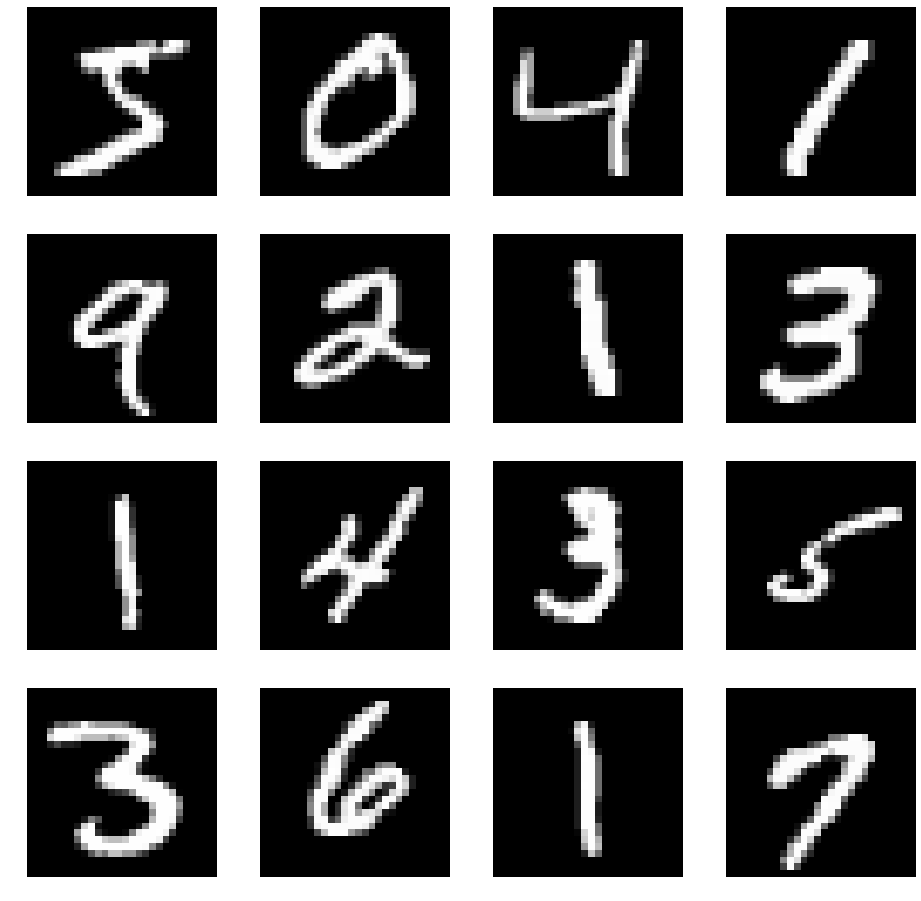

In [10]:
#Prepare and draw images in grid 
images=[]
for  i in range(16):
    image=trainX[i]
    image = cv2.merge([image] * 3)
    images.append(image)

drarwGridOfImagesFromImagesData(images)

In [47]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
# with sparse_categorical_crossentropy no need to do one hot encoding 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
history=model.fit(trainX, trainY, validation_data=(testX, testY),epochs=epochs_num)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 19s 310us/sample - loss: 0.2976 - accuracy: 0.9140 - val_loss: 0.1385 - val_accuracy: 0.9600
Epoch 2/10
60000/60000 [==============================] - 12s 204us/sample - loss: 0.1456 - accuracy: 0.9560 - val_loss: 0.0969 - val_accuracy: 0.9713
Epoch 3/10
60000/60000 [==============================] - 14s 234us/sample - loss: 0.1083 - accuracy: 0.9671 - val_loss: 0.0923 - val_accuracy: 0.9698
Epoch 4/10
60000/60000 [==============================] - 13s 219us/sample - loss: 0.0894 - accuracy: 0.9729 - val_loss: 0.0872 - val_accuracy: 0.9722
Epoch 5/10
60000/60000 [==============================] - 13s 212us/sample - loss: 0.0764 - accuracy: 0.9766 - val_loss: 0.0787 - val_accuracy: 0.9763
Epoch 6/10
60000/60000 [==============================] - 13s 213us/sample - loss: 0.0673 - accuracy: 0.9794 - val_loss: 0.0708 - val_accuracy: 0.9792
Epoch 7/10
60000/60000 [====================

In [59]:
#draw training curves	
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]   
epochs   = range(len(acc)) # Get number of epochs


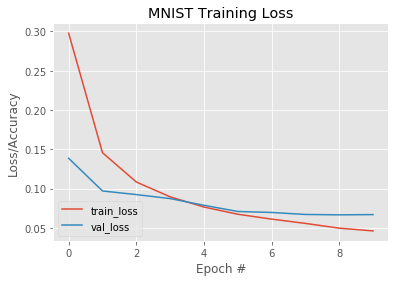

In [60]:
plt.style.use("ggplot")
plt.figure()
plt.plot(epochs, loss, label="train_loss")
plt.plot(epochs, val_loss, label="val_loss")

plt.title("MNIST Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

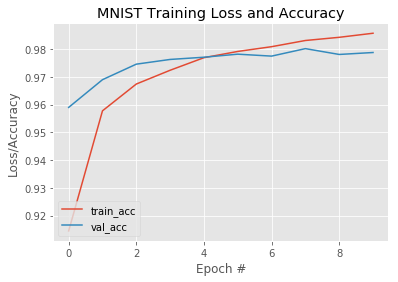

In [17]:
plt.style.use("ggplot")
plt.figure()

plt.plot(epochs, acc, label="train_acc")
plt.plot(epochs, val_acc, label="val_acc")
plt.title("MNIST Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

In [62]:
# evaluate the network

print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
y_pred=predictions.argmax(axis=1)

print(classification_report(testY,y_pred, target_names=labels))
print(confusion_matrix(testY, y_pred))


[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.97      0.97      1009

   micro avg       0.98      0.98      0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

[[ 974    0    0    0    0    0    3    1    2    0]
 [   0 1125    3    0    0    1    2    1    3    0]
 [   5    0 1004    2    2    0    2   10    7    0]
 [   1    0    2  986    1    6    0    7    3    4]
